Taken from the [blog post](https://www.dunderdata.com/blog/create-a-bar-chart-race-animation-in-python-with-matplotlib#Using-bar_chart_race) and the [github](https://github.com/dexplo/bar_chart_race) of the package used 

In [3]:
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("full_grouped.csv")

In [5]:
df.drop(["Confirmed","Recovered","Active","New cases","Deaths","New recovered","WHO Region"], axis=1, inplace=True)

In [6]:
#https://stackoverflow.com/questions/22127569/opposite-of-melt-in-python-pandas
#df.groupby(['Date', 'Country/Region'])["New deaths"].aggregate('mean').unstack().cumsum()
#df.pivot_table(values="New deaths", index='Date', columns='Country/Region').cumsum()
#df.set_index(['Date', 'Country/Region'])["New deaths"].unstack().cumsum()
#for the reverse of the melting operation

df = df.pivot(index='Date', columns='Country/Region')["New deaths"].cumsum()

In [7]:
df3 = df.copy() #used in the package, because limiting the bars in package is easy

col_to_use = df.loc["2020-07-13"].sort_values().tail(15).index
df = df[col_to_use] #just used 15 of them because of the problem of limiting bars in code

In [8]:
s = df.loc['2020-03-29'] #individual barchart
s

Country/Region
Chile                 7
Canada               63
Germany             533
Belgium             431
Russia                8
Peru                 18
Iran               2640
India                27
Spain              6803
France             2611
Italy             10779
Mexico               20
United Kingdom     1672
Brazil              136
US                 3561
Name: 2020-03-29, dtype: int64

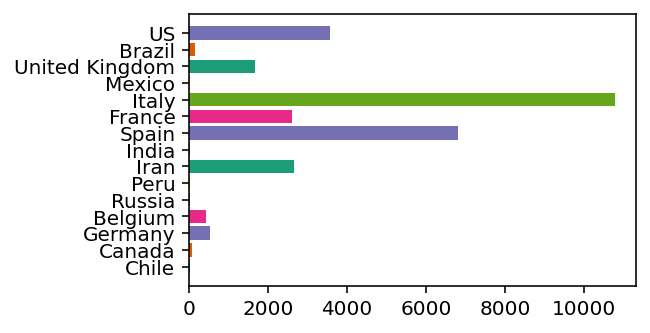

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

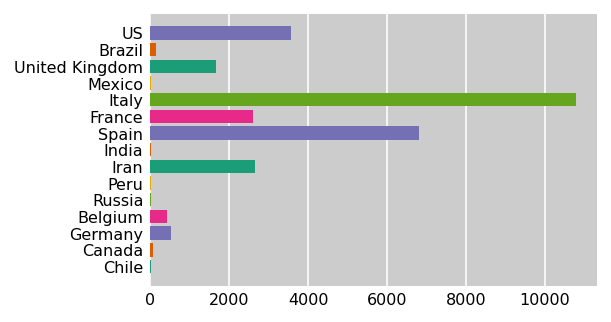

In [10]:
#more fancy axes
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

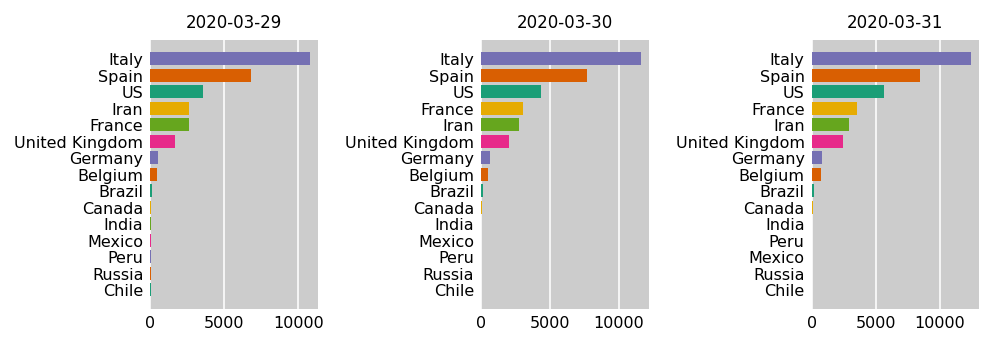

In [11]:
#3 ordered figures for three days
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), 
                             dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30', '2020-03-31']
for ax, date in zip(ax_array, dates):
    s = df.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [12]:
#this method does the ranking without changing the color of countries
df.loc['2020-03-29'].rank(method='first')

Country/Region
Chile              1.0
Canada             6.0
Germany            9.0
Belgium            8.0
Russia             2.0
Peru               3.0
Iran              12.0
India              5.0
Spain             14.0
France            11.0
Italy             15.0
Mexico             4.0
United Kingdom    10.0
Brazil             7.0
US                13.0
Name: 2020-03-29, dtype: float64

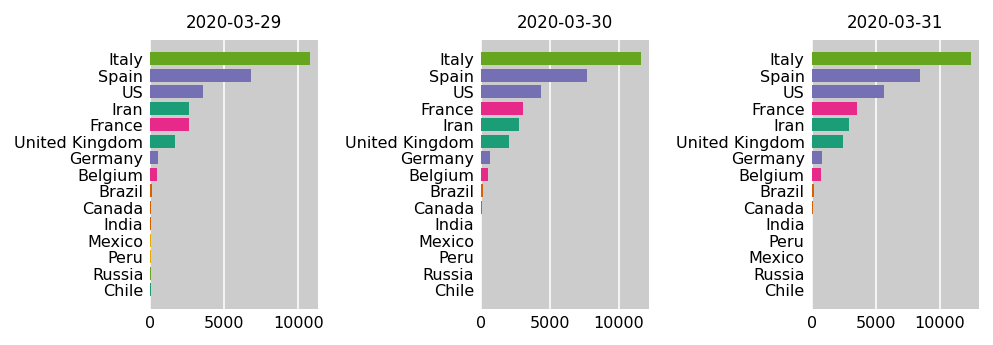

In [13]:
#no color change
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), 
                             dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30', '2020-03-31']
for ax, date in zip(ax_array, dates):
    s = df.loc[date]
    y = df.loc[date].rank(method='first')
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [14]:
df2 = df.loc['2020-03-29':'2020-03-31']
df2

Country/Region,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
Date,,,,,,,,,,,,,,,
2020-03-29,7,63,533,431,8,18,2640,27,6803,2611,10779,20,1672,136,3561
2020-03-30,8,79,645,513,9,24,2757,32,7716,3030,11591,28,2046,159,4381
2020-03-31,12,100,775,705,17,30,2898,35,8464,3532,12428,29,2429,201,5605


In [15]:
df2 = df2.reset_index()
df2

Country/Region,Date,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
0,2020-03-29,7,63,533,431,8,18,2640,27,6803,2611,10779,20,1672,136,3561
1,2020-03-30,8,79,645,513,9,24,2757,32,7716,3030,11591,28,2046,159,4381
2,2020-03-31,12,100,775,705,17,30,2898,35,8464,3532,12428,29,2429,201,5605


In [16]:
#adding steps so that transition would be smooth
df2.index = df2.index * 5
df2

Country/Region,Date,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
0,2020-03-29,7,63,533,431,8,18,2640,27,6803,2611,10779,20,1672,136,3561
5,2020-03-30,8,79,645,513,9,24,2757,32,7716,3030,11591,28,2046,159,4381
10,2020-03-31,12,100,775,705,17,30,2898,35,8464,3532,12428,29,2429,201,5605


In [17]:
#to be able to index with new Nan values
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded

Country/Region,Date,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
0,2020-03-29,7.0,63.0,533.0,431.0,8.0,18.0,2640.0,27.0,6803.0,2611.0,10779.0,20.0,1672.0,136.0,3561.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-30,8.0,79.0,645.0,513.0,9.0,24.0,2757.0,32.0,7716.0,3030.0,11591.0,28.0,2046.0,159.0,4381.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Date as index
df_expanded['Date'] = df_expanded['Date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('Date')
df_expanded

Country/Region,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
Date,,,,,,,,,,,,,,,
2020-03-29,7.0,63.0,533.0,431.0,8.0,18.0,2640.0,27.0,6803.0,2611.0,10779.0,20.0,1672.0,136.0,3561.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,8.0,79.0,645.0,513.0,9.0,24.0,2757.0,32.0,7716.0,3030.0,11591.0,28.0,2046.0,159.0,4381.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#to create rank of each country for using in the plot
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

Country/Region,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
Date,,,,,,,,,,,,,,,
2020-03-29,1.0,6.0,9.0,8.0,2.0,3.0,12.0,5.0,14.0,11.0,15.0,4.0,10.0,7.0,13.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,1.0,6.0,9.0,8.0,2.0,3.0,11.0,5.0,14.0,12.0,15.0,4.0,10.0,7.0,13.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#interpolate the Nans
df_expanded = df_expanded.interpolate()
df_expanded

Country/Region,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
Date,,,,,,,,,,,,,,,
2020-03-29,7.0,63.0,533.0,431.0,8.0,18.0,2640.0,27.0,6803.0,2611.0,10779.0,20.0,1672.0,136.0,3561.0
2020-03-29,7.2,66.2,555.4,447.4,8.2,19.2,2663.4,28.0,6985.6,2694.8,10941.4,21.6,1746.8,140.6,3725.0
2020-03-29,7.4,69.4,577.8,463.8,8.4,20.4,2686.8,29.0,7168.2,2778.6,11103.8,23.2,1821.6,145.2,3889.0
2020-03-29,7.6,72.6,600.2,480.2,8.6,21.6,2710.2,30.0,7350.8,2862.4,11266.2,24.8,1896.4,149.8,4053.0
2020-03-29,7.8,75.8,622.6,496.6,8.8,22.8,2733.6,31.0,7533.4,2946.2,11428.6,26.4,1971.2,154.4,4217.0
2020-03-30,8.0,79.0,645.0,513.0,9.0,24.0,2757.0,32.0,7716.0,3030.0,11591.0,28.0,2046.0,159.0,4381.0
2020-03-30,8.8,83.2,671.0,551.4,10.6,25.2,2785.2,32.6,7865.6,3130.4,11758.4,28.2,2122.6,167.4,4625.8
2020-03-30,9.6,87.4,697.0,589.8,12.2,26.4,2813.4,33.2,8015.2,3230.8,11925.8,28.4,2199.2,175.8,4870.6
2020-03-30,10.4,91.6,723.0,628.2,13.8,27.6,2841.6,33.8,8164.8,3331.2,12093.2,28.6,2275.8,184.2,5115.4


In [21]:
#same interpolating need for ranking
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

Country/Region,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
Date,,,,,,,,,,,,,,,
2020-03-29,1.0,6.0,9.0,8.0,2.0,3.0,12.0,5.0,14.0,11.0,15.0,4.0,10.0,7.0,13.0
2020-03-29,1.0,6.0,9.0,8.0,2.0,3.0,11.8,5.0,14.0,11.2,15.0,4.0,10.0,7.0,13.0
2020-03-29,1.0,6.0,9.0,8.0,2.0,3.0,11.6,5.0,14.0,11.4,15.0,4.0,10.0,7.0,13.0
2020-03-29,1.0,6.0,9.0,8.0,2.0,3.0,11.4,5.0,14.0,11.6,15.0,4.0,10.0,7.0,13.0
2020-03-29,1.0,6.0,9.0,8.0,2.0,3.0,11.2,5.0,14.0,11.8,15.0,4.0,10.0,7.0,13.0
2020-03-30,1.0,6.0,9.0,8.0,2.0,3.0,11.0,5.0,14.0,12.0,15.0,4.0,10.0,7.0,13.0
2020-03-30,1.0,6.0,9.0,8.0,2.0,3.2,11.0,5.0,14.0,12.0,15.0,3.8,10.0,7.0,13.0
2020-03-30,1.0,6.0,9.0,8.0,2.0,3.4,11.0,5.0,14.0,12.0,15.0,3.6,10.0,7.0,13.0
2020-03-30,1.0,6.0,9.0,8.0,2.0,3.6,11.0,5.0,14.0,12.0,15.0,3.4,10.0,7.0,13.0


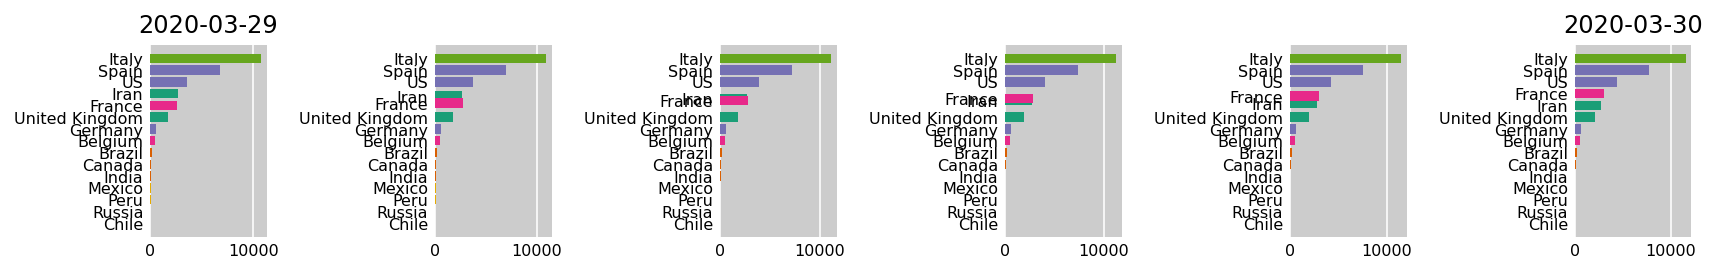

In [22]:
#ploting the df2 graph
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-29')
ax_array[-1].set_title('2020-03-30');

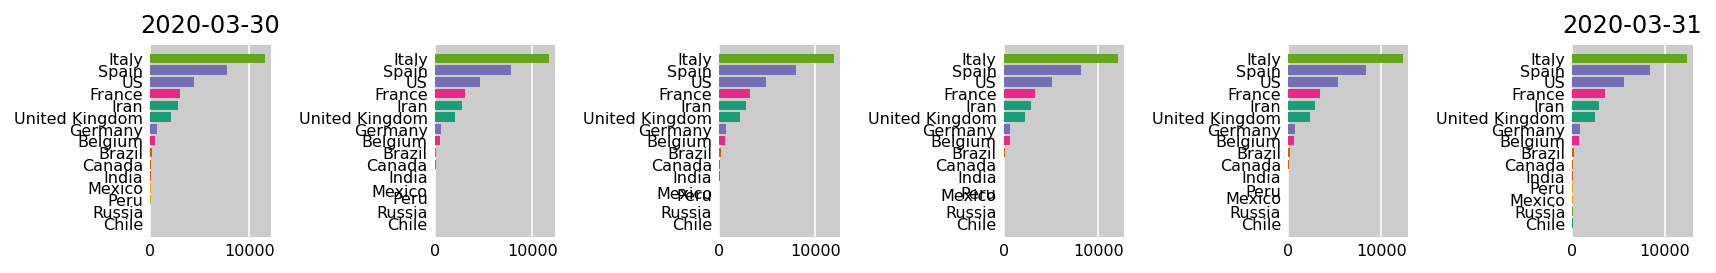

In [23]:
#Plot of the next day
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=5):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-30')
ax_array[-1].set_title('2020-03-31');

In [24]:
#function for the preparation of graph, we use df1 here. df3 for package and df2 for the previous examples
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['Date'] = df_expanded['Date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('Date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

Country/Region,Chile,Canada,Germany,Belgium,Russia,Peru,Iran,India,Spain,France,Italy,Mexico,United Kingdom,Brazil,US
Date,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Animation for the video

def init():
    ax.clear() #clears the previous axes of all objects and then resets its nice properties
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i): #You must define a function that updates the matplotlib axes object each frame
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i]
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [26]:
from IPython.display import HTML 
html = anim.to_html5_video()  #Call the to_html5_video method to return the animation as an HTML string
HTML(html) # then embed it in the notebook with help from the IPython.display module.

In [27]:
anim.save('covid19_1.mp4') #covid19_1.mp4 comes from the example code

In [29]:
pip install bar_chart_race

     |████████████████████████████████| 163kB 6.5MB/s 


In [34]:
import bar_chart_race as bcr  #package for the automatization of the process
bcr.bar_chart_race(
    df=df3,
    filename='covid19_2.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=False,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'DejaVu Sans'},
    perpendicular_bar_func='mean',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='COVID-19 Deaths by Country',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  #covid19_2.mp4 comes from the package